In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [56]:
df=pd.read_excel("the data.xlsx")

In [57]:
df.describe()

,HR,SWT,SWD,SWS,R,Dst,F10.7
count,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000
mean,11.499456,7.180214e+04,6.480424,398.516152,28.927021,-5.949392,84.750816
std,6.922062,6.390782e+04,4.673641,81.127638,33.713918,11.850067,20.956627
min,0.000000,4.002000e+03,0.600000,259.000000,0.000000,-105.000000,67.400000
25%,5.500000,2.875200e+04,3.300000,335.000000,0.000000,-12.000000,71.300000
50%,11.000000,5.148600e+04,5.100000,382.000000,17.000000,-4.000000,76.100000
75%,17.000000,9.372600e+04,8.200000,447.000000,43.000000,2.000000,90.200000
max,23.000000,1.312945e+06,53.500000,762.000000,161.000000,42.000000,239.000000


In [58]:
df.head()

,DATE,HR,SWT,SWD,SWS,R,Dst,F10.7
0,2020-01-01,0.0,22067.0,10.0,295.0,6.0,-6.0,69.4
1,2020-01-01,1.0,30130.0,7.8,299.0,6.0,-1.0,69.4
2,2020-01-01,2.0,39156.0,8.3,300.0,6.0,3.0,69.4
3,2020-01-01,3.0,25524.0,5.5,298.0,6.0,5.0,69.4
4,2020-01-01,4.0,30304.0,7.6,302.0,6.0,7.0,69.4


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21191 entries, 0 to 21190
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    21143 non-null  datetime64[ns]
 1   HR      21143 non-null  float64       
 2   SWT     21143 non-null  float64       
 3   SWD     21143 non-null  float64       
 4   SWS     21143 non-null  float64       
 5   R       21143 non-null  float64       
 6   Dst     21143 non-null  float64       
 7   F10.7   21143 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.3 MB


In [60]:
import pandas_profiling as pdp

In [61]:
#report=pdp.ProfileReport(df)
#report

In [62]:
#report.to_file("nasa report1")

In [63]:
#df.HR=pd.to_datetime(df.HR)

In [64]:
df.DATE=pd.to_datetime(df.DATE)

In [65]:
df = df.replace('?', np.nan)
df.isnull().sum()

DATE     48
HR       48
SWT      48
SWD      48
SWS      48
R        48
Dst      48
F10.7    48
dtype: int64

In [66]:
def fill_missing(values):
    one_day = 60*24
    for row in range(df.shape[0]):
        for col in range(df.shape[1]):
            if np.isnan(values[row][col]):
                values[row,col] = values[row-one_day,col]
df = df.astype('float32')
fill_missing(df.values)
df.isnull().sum()



TypeError: Cannot cast DatetimeArray to dtype float32

In [67]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df = df.set_index("DATE")
df.head(25)

,HR,SWT,SWD,SWS,R,Dst,F10.7
DATE,,,,,,,
2020-01-01,0.0,22067.0,10.0,295.0,6.0,-6.0,69.4
2020-01-01,1.0,30130.0,7.8,299.0,6.0,-1.0,69.4
2020-01-01,2.0,39156.0,8.3,300.0,6.0,3.0,69.4
2020-01-01,3.0,25524.0,5.5,298.0,6.0,5.0,69.4
2020-01-01,4.0,30304.0,7.6,302.0,6.0,7.0,69.4
2020-01-01,5.0,35261.0,7.5,311.0,6.0,10.0,69.4
2020-01-01,6.0,30589.0,6.4,313.0,6.0,11.0,69.4
2020-01-01,7.0,43851.0,8.5,326.0,6.0,8.0,69.4
2020-01-01,8.0,43397.0,8.0,330.0,6.0,3.0,69.4


In [69]:
daily_df = df.resample('D').sum()
daily_df.head()

,HR,SWT,SWD,SWS,R,Dst,F10.7
DATE,,,,,,,
2020-01-01,276.0,763717.0,220.4,7633.0,144.0,68.0,1665.6
2020-01-02,276.0,863958.0,192.1,7985.0,288.0,41.0,1668.0
2020-01-03,276.0,1674904.0,247.3,8493.0,312.0,-23.0,1653.6
2020-01-04,276.0,1042144.0,96.7,9202.0,288.0,-266.0,1675.2
2020-01-05,276.0,2343877.0,217.5,9326.0,336.0,-172.0,1665.6


In [70]:
train_df,test_df = daily_df[1:15000], daily_df[15000:] 

 

In [71]:
df.drop(['HR'],axis=1,inplace=True)

In [72]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [52]:
df.head(25)

,SWT,SWD,SWS,R,Dst,F10.7
DATE,,,,,,
2020-01-01,22067.0,10.0,295.0,6.0,-6.0,69.400002
2020-01-01,30130.0,7.8,299.0,6.0,-1.0,69.400002
2020-01-01,39156.0,8.3,300.0,6.0,3.0,69.400002
2020-01-01,25524.0,5.5,298.0,6.0,5.0,69.400002
2020-01-01,30304.0,7.6,302.0,6.0,7.0,69.400002
2020-01-01,35261.0,7.5,311.0,6.0,10.0,69.400002
2020-01-01,30589.0,6.4,313.0,6.0,11.0,69.400002
2020-01-01,43851.0,8.5,326.0,6.0,8.0,69.400002
2020-01-01,43397.0,8.0,330.0,6.0,3.0,69.400002


In [73]:


def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
        break
        # slicing the past and future parts of the window
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)



IndentationError: expected an indented block (Temp/ipykernel_12932/3461775715.py, line 12)

In [15]:
df

,HR,SWT,SWD,SWS,R,Dst,F10.7
DATE,,,,,,,
2020-01-01,0.0,22067.0,10.0,295.0,6.0,-6.0,69.4
2020-01-01,1.0,30130.0,7.8,299.0,6.0,-1.0,69.4
2020-01-01,2.0,39156.0,8.3,300.0,6.0,3.0,69.4
2020-01-01,3.0,25524.0,5.5,298.0,6.0,5.0,69.4
2020-01-01,4.0,30304.0,7.6,302.0,6.0,7.0,69.4
...,...,...,...,...,...,...,...
2022-09-13,18.0,41046.0,1.9,394.0,63.0,-9.0,107.1
2022-09-13,19.0,53697.0,2.1,397.0,63.0,-11.0,107.1
2022-09-13,20.0,58395.0,1.6,390.0,63.0,-13.0,107.1


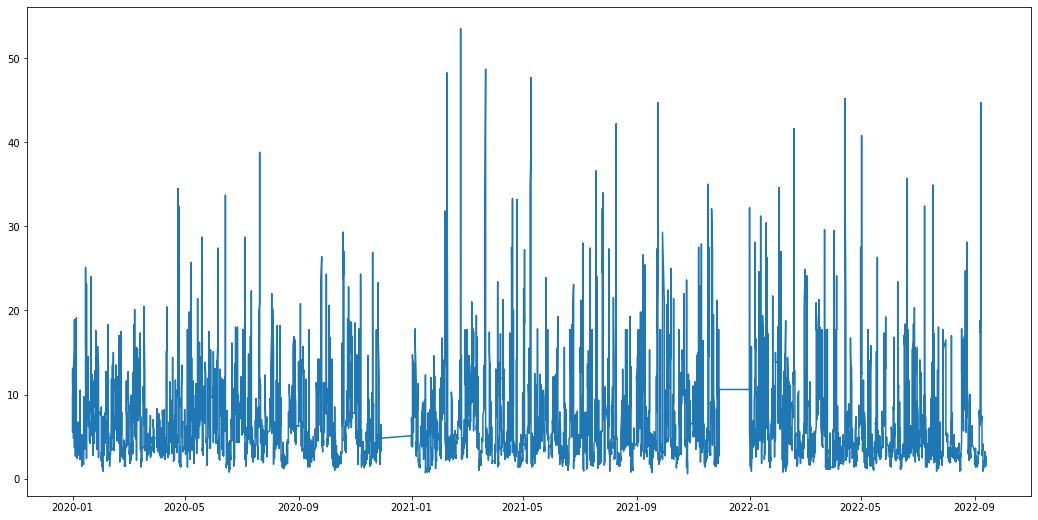

In [16]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["SWD"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

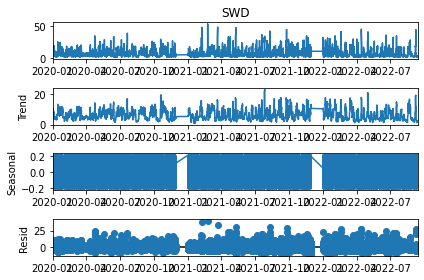

In [17]:
df.dropna(inplace=True)
a = seasonal_decompose(df["SWD"], model = "add", period=30)
a.plot();

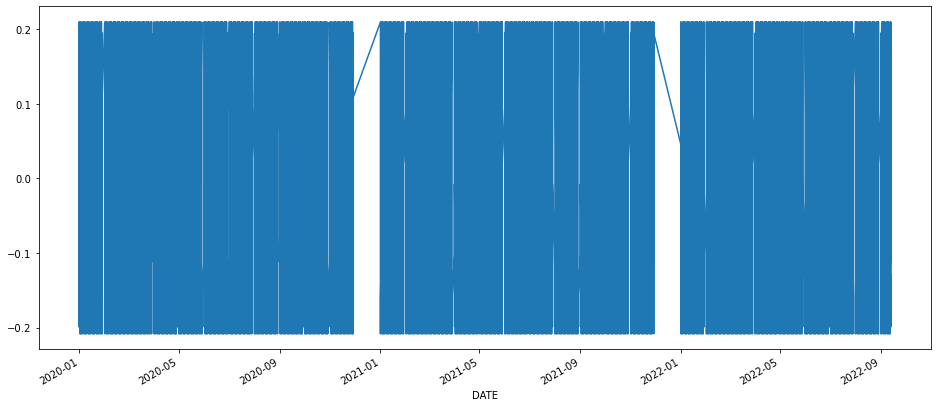

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [24]:
df_2= pd.DataFrame(df.SWD)

In [25]:
df_2

,SWD
DATE,
2020-01-01,10.0
2020-01-01,7.8
2020-01-01,8.3
2020-01-01,5.5
2020-01-01,7.6
...,...
2022-09-13,1.9
2022-09-13,2.1
2022-09-13,1.6


In [26]:
df_2=scaler.fit_transform(df_2)

In [27]:
df_2

array([[0.17769376],
       [0.13610586],
       [0.14555766],
       ...,
       [0.01890359],
       [0.03213611],
       [0.03213611]])

In [28]:
f_Set=[]
l=[]

In [30]:
for i in range( 60 , 1260):
    f_Set.append(df_2[i-60:i,i])
    l.append(df_2[i,0])
    

IndexError: index 60 is out of bounds for axis 1 with size 1